# PHASE 1 LIVE CODE 3

# **I. INTRODUCTION**

Greetings, everyone. Welcome to my notebook. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23 years old
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## 1.1 ABOUT THE DATA

## 1.2 PROBLEM STATEMENT

An NGO committed to fighting poverty and providing basic facilities and assistance to people in underprivileged countries. Recently, they have been able to raise around $10 million. The CEO of the NGO needs to decide how to use this money strategically and effectively. A significant issue that arises when making this decision relates to selecting which countries need assistance most.

Create an Unsupervised Learning machine learning model using KMeans to group the countries. You are required to suggest which countries the CEO should focus on.

## 1.3 OBJECTIVES

1. Looking for interesting insights from the results of exploratory data analysis
2. Finding the optimal cluster obtained based on machine learning algorithms and visualizing the results of the clustering.
3. Look for the characteristics of each cluster
4. Looking for meaningful insight based on objective number 3
5. Compared with EDA, are there any similarities from the clustering results obtained?

# **II. IMPORT LIBRARIES**

Because cleanliness and tidiness are part of faith, so I want what I do to be well organized and organized. This section is used for importing libraries that I will use in this project.

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
import scipy.stats as stats
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

# **III. DATA LOADING**

This section is used to load data into the notebook. The dataset I put in the `df` variable.

In [28]:
df = pd.read_csv('Country-data.csv')

Here is the preview of the data that I've loaded into the notebook.

In [29]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


# **IV. DATA CLEANING**

This section is a section that is intended to perform data cleaning and also data manipulation if necessary.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In the loaded dataset, there are 10 columns and 167 rows. As far as my eyes can see, there are no missing values in the dataset. To make clarify it, I will run this command below.

In [32]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

And then I am also going to check the duplicated values in the dataset.

In [33]:
df.duplicated().sum()

0

All data cleaning processes have been completed, the next step is to make duplicates of the cleaned datasets (for research purposes if needed)

In [34]:
df_copy = df.copy()

# **V. EXPLORATORY DATA ANALYSIS (EDA)**

In this section, I will do an exploratory data analysis.

## 5.1 INCOME

### 5.1.1 CHILD MORTALITY VS INCOME

Text(0.5, 1.0, 'Income vs Child mortality')

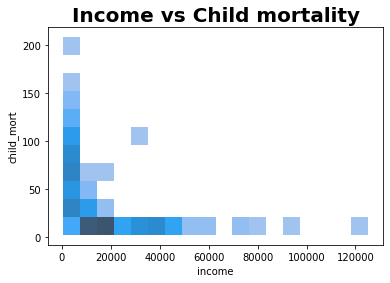

In [35]:
sns.histplot(x='income',y='child_mort', data=df_copy)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

From the graph above, we can see that people who earn less money will have a higher chance of child mortality.

### 5.1.2 INCOME VS TOTAL FERTILITY

Text(0.5, 1.0, 'Income vs Total Fertility')

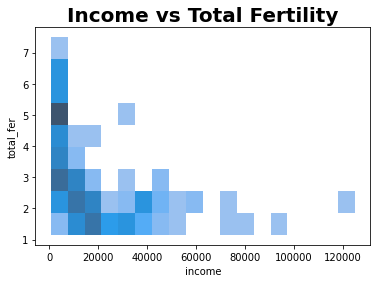

In [36]:
sns.histplot(x='income',y='total_fer', data=df_copy)
plt.title('Income vs Total Fertility',fontweight="bold", size=20)

From the graph above, we can see that people who earn less money have high fertility. And if it combined with previous graph, people who earn less money more more fertile and have higher chance of child mortality.

### 5.1.3 INCOME VS COUNTRY

In [37]:
country_grouped= df_copy.groupby('country').income.sum().sort_values(ascending=False)
country_grouped=pd.DataFrame(country_grouped)
Country1=country_grouped.head()
Country2=country_grouped.tail()

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


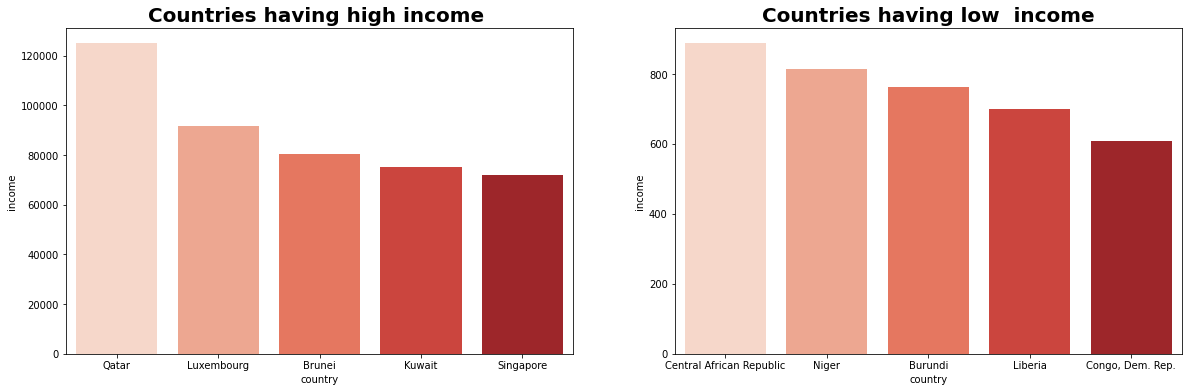

In [38]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.income, palette='Reds')
plt.title('Countries having high income ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.income, palette='Reds')
plt.title('Countries having low  income',fontweight="bold", size=20)
plt.show()

From graphs above, we can see that Qatar is the country with high earning money people and Congo, Dem. Rep is the country with the low earning money people.

### 5.1.4 InCOME VS GDPP

Text(0.5, 1.0, 'Income vs GDPP')

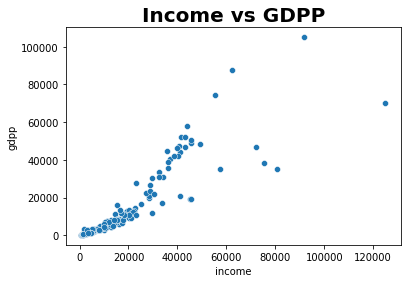

In [39]:
sns.scatterplot(x='income',y='gdpp', data=df_copy)
plt.title('Income vs GDPP',fontweight="bold", size=20)

From the graph above, we know that income is directly proportional to the GDP of a country

### 5.1.5 INCOME VS HEALTH

Text(0.5, 1.0, 'Income vs Health')

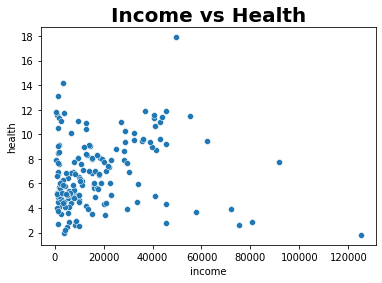

In [40]:
sns.scatterplot(x='income',y='health', data=df_copy)
plt.title('Income vs Health',fontweight="bold", size=20)

From the graph above, we can see that people who earn less money is more likely spend more on health care.

### 5.1.6 INCOME VS LIFE EXPEC

Text(0.5, 1.0, 'Income vs Life Expec')

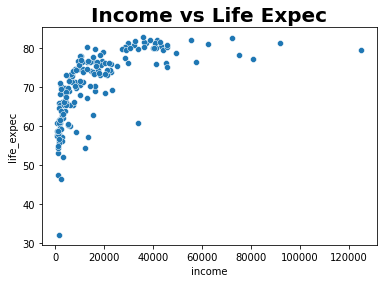

In [41]:
sns.scatterplot(x='income',y='life_expec', data=df_copy)
plt.title('Income vs Life Expec',fontweight="bold", size=20)

From the graph above, surprisingly, people who earn less money has average of life expec about 50 to 80 years if the current mortality patterns are to remain the same.

### 5.2 COUNTRY

### 5.2.1 COUNTRY VS GDP

In [42]:
country_grouped_gdp= df.groupby('country').gdpp.sum().sort_values(ascending=False)
country_grouped_gdp=pd.DataFrame(country_grouped_gdp)
GDP1=country_grouped_gdp.head()
GDP2=country_grouped_gdp.tail()

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


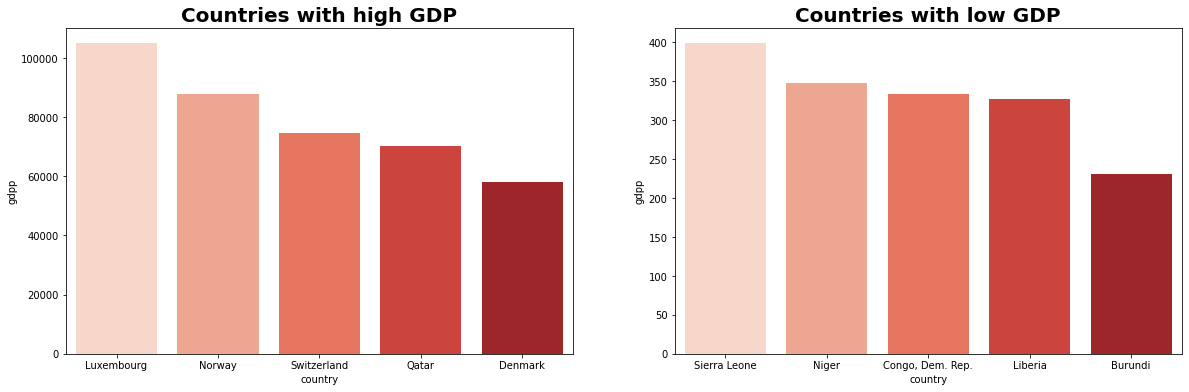

In [43]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='Reds')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='Reds')
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

From 2 graphs above, we can see that Luxembourg is country with the highest GDP, and turns out that Qatar is in the top 4th position of highest GDP country. And for the low GDP country Congo, Dem. Rep. is positioned in the last three, while the lowest GDP country is Burundi.

### 5.2.2 COUNTRY VS HEALTH

In [44]:
country_grouped_health= df.groupby('country').health.sum().sort_values(ascending=False)
country_grouped_health=pd.DataFrame(country_grouped_health)
health1=country_grouped_health.head()
health2=country_grouped_health.tail()

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


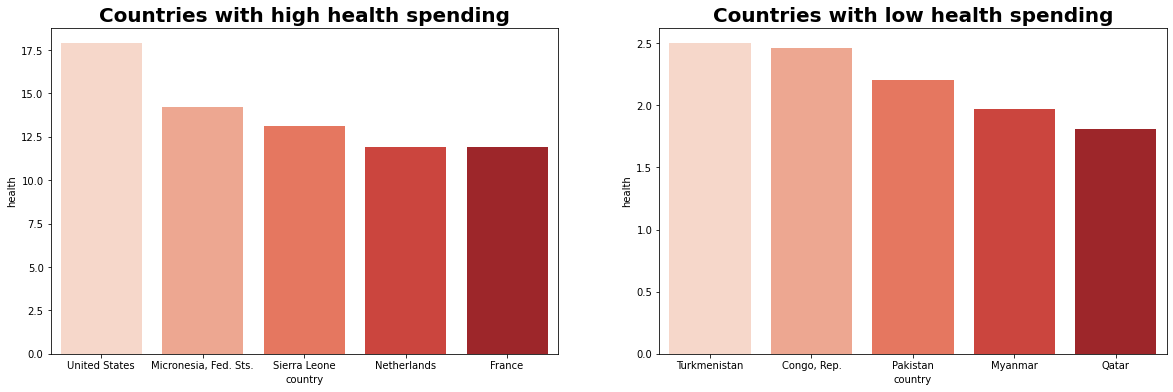

In [45]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(health1.index, health1.health, palette='Reds')
plt.title('Countries with high health spending',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(health2.index, health2.health, palette='Reds')
plt.title('Countries with low health spending',fontweight="bold", size=20)
plt.show()

From 2 graphs above, we may know that US is the country with the highest spending on health sector and Qatar is the lowest country with spending on the health sector.

# **VI. DATA PREPROCESSING**

In [46]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Here is the skewness value for each column in the dataset.

In [47]:
df_copy.drop(['country'],axis=1,inplace=True)

In [48]:
for i, col in enumerate(df_copy.columns):
    print('Skewness Value',(col),':', df[col].skew())

Skewness Value child_mort : 1.4507735387555047
Skewness Value exports : 2.4458240051613496
Skewness Value health : 0.7057460547100981
Skewness Value imports : 1.90527571988626
Skewness Value income : 2.231479607767527
Skewness Value inflation : 5.154049359697971
Skewness Value life_expec : -0.9709955819991258
Skewness Value total_fer : 0.9670916808050207
Skewness Value gdpp : 2.2180514519497163


Here is the visualization of data distribution from each column in the dataset.

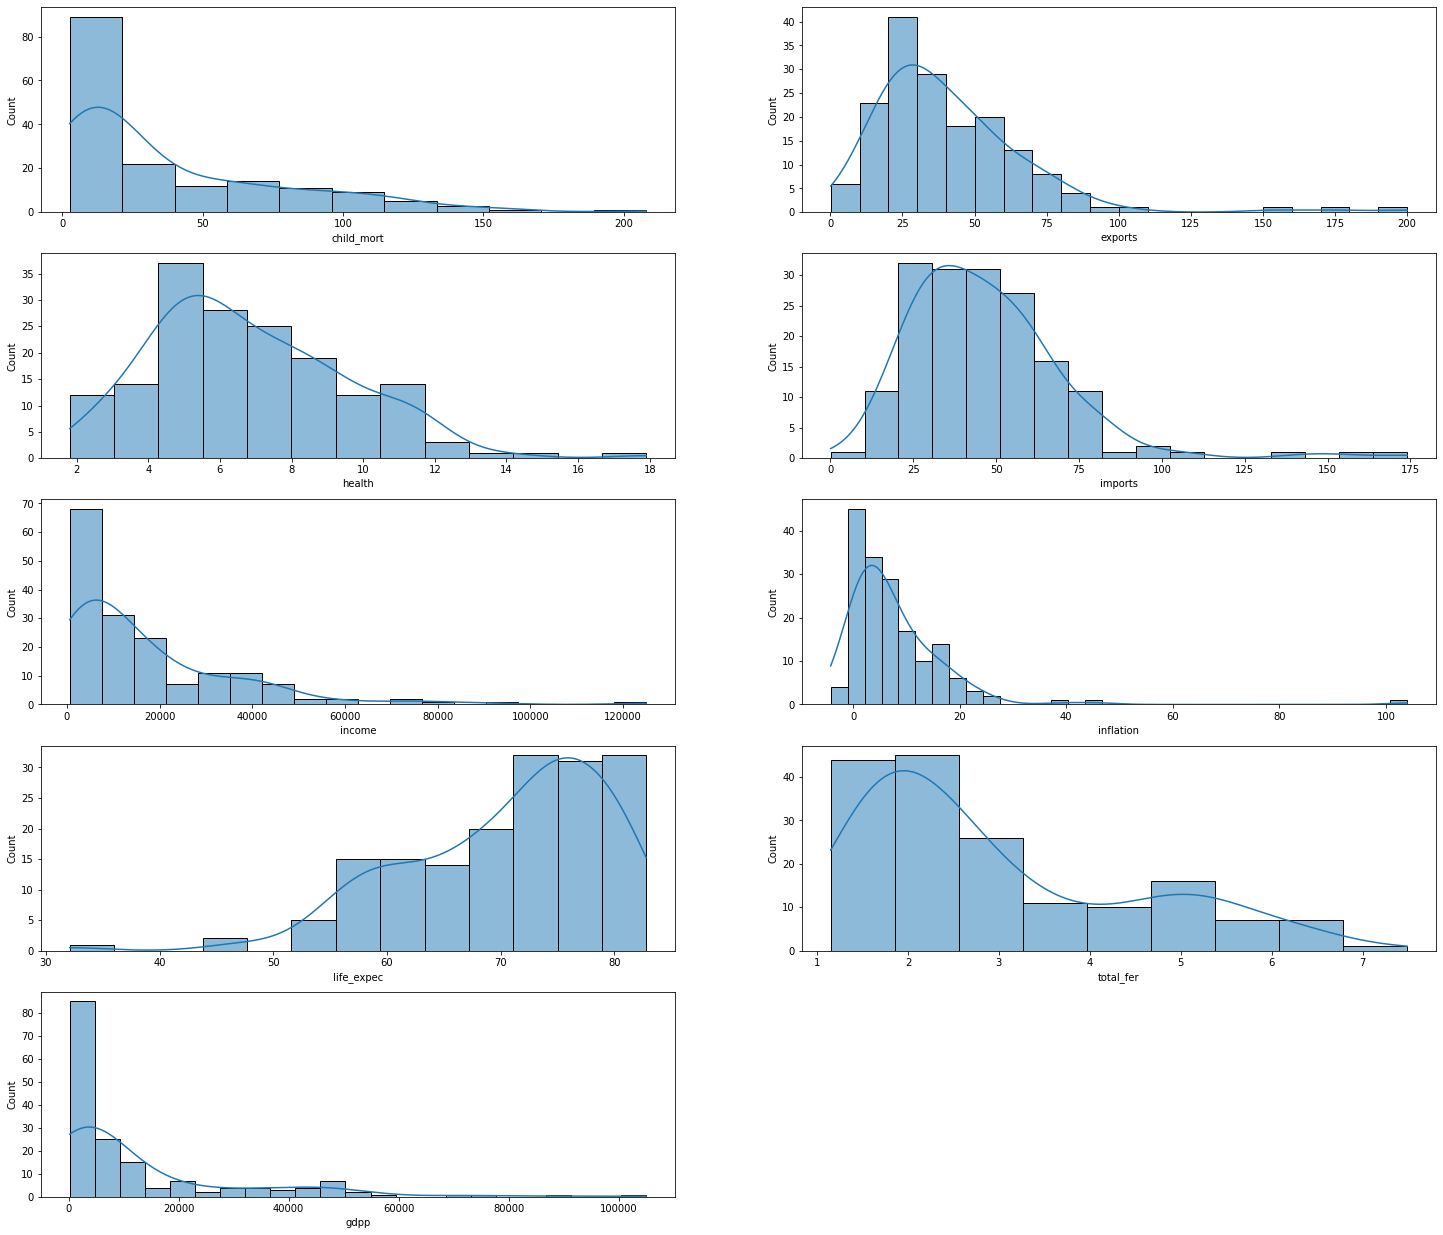

In [49]:
plt.figure(figsize=(25,40))
for i, col in enumerate(df_copy.columns):
    if df_copy[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(df_copy[col], ax=ax, kde=True)
        plt.xlabel(col)
        
plt.show()

I will handle the outliers later in another sub section

## 6.1 DATA SPLITTING

Splitting the data into train and test data.

In [50]:
train, test = train_test_split(df_copy, test_size=0.2, random_state=42)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (133, 9)
Test size:  (34, 9)


## 6.2 OUTLIERS HANDLING

I will handle the outliers using IQR method because the data is extremly skewed.

In [51]:
def find_normal_bound(data, feature):
    normal_lower_bound = data[feature].mean() - 3 * data[feature].std()
    normal_upper_bound = data[feature].mean() + 3 * data[feature].std()

    return normal_lower_bound, normal_upper_bound

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    skew_lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    skew_upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return skew_lower_bound, skew_upper_bound

In [52]:
capper = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['child_mort',
                                        'exports',
                                        'health',
                                        'imports',
                                        'income',
                                        'inflation',
                                        'life_expec',
                                        'total_fer',
                                        'gdpp'])
capper.fit(train)
train_clean = capper.transform(train)

Here is the visualization after outliers handling.

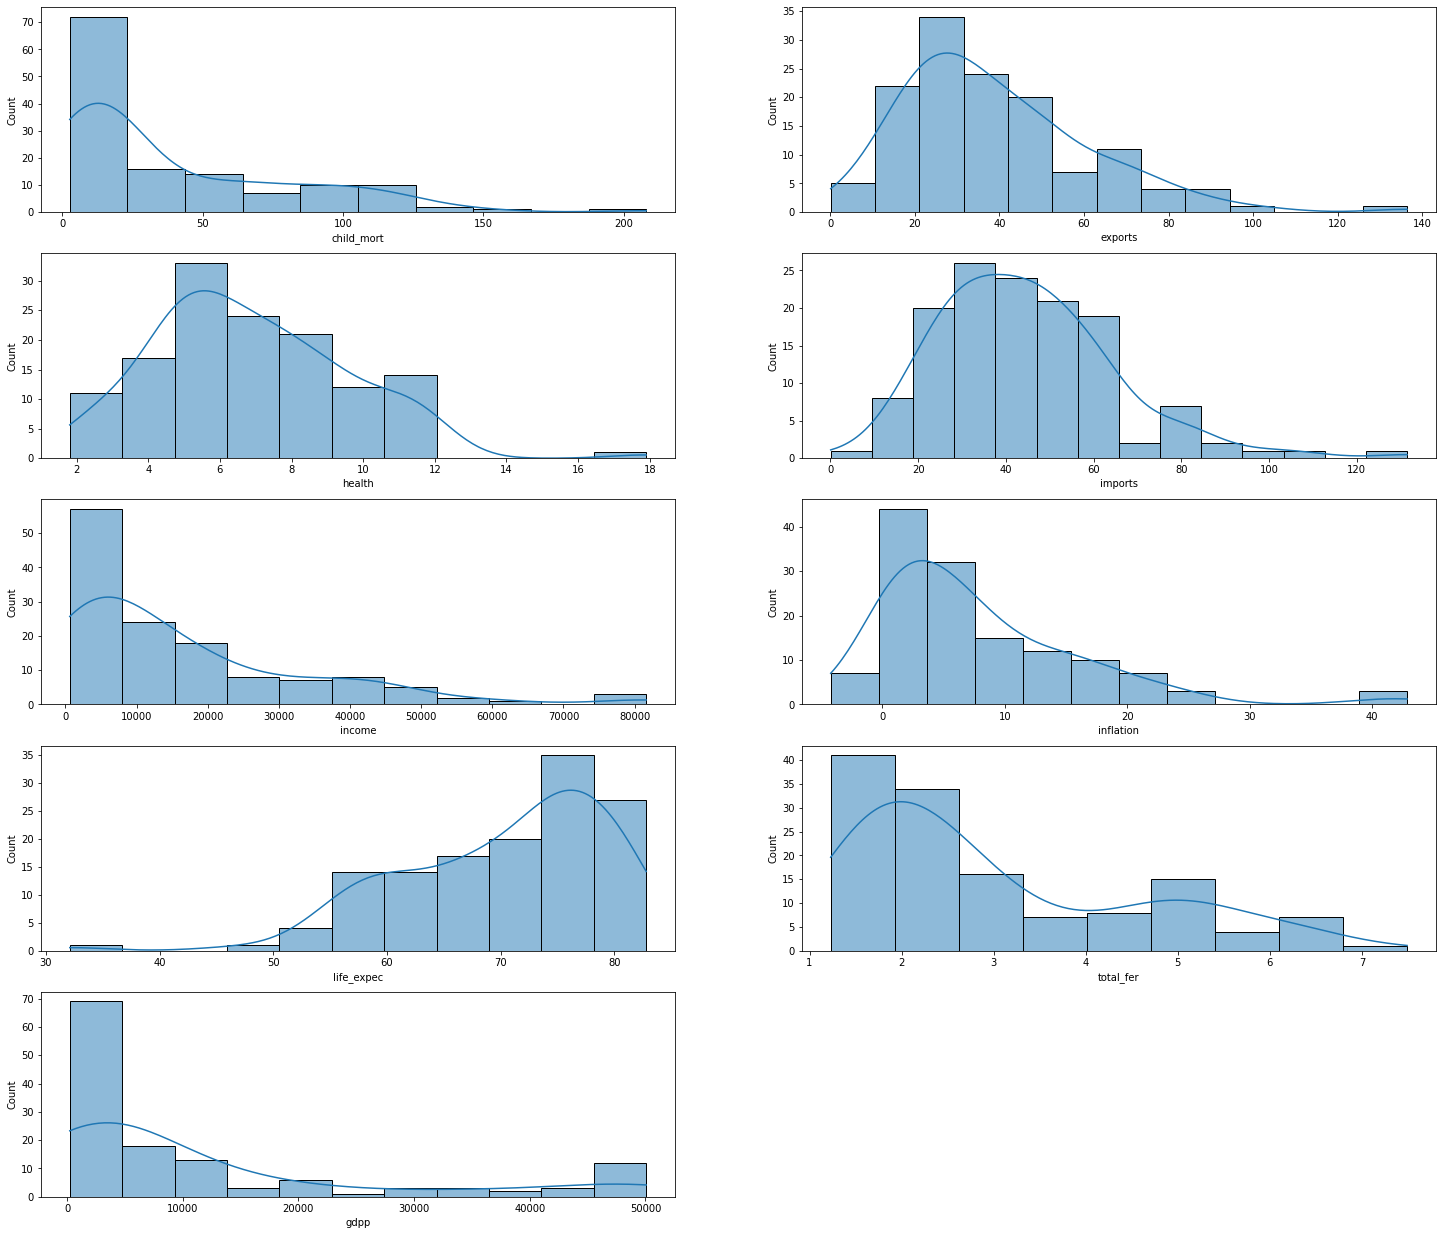

In [53]:
plt.figure(figsize=(25,40))
for i, col in enumerate(train_clean.columns):
    if train_clean[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(train_clean[col], ax=ax, kde=True)
        plt.xlabel(col)
        
plt.show()

## 6.3 FEATURE SCALING

Scaling the numerical features in the dataset

In [54]:
scaler = StandardScaler()
scaler.fit(train_clean)

train_scaled = scaler.transform(train_clean)

train_scaled

array([[-0.83746628, -0.48775602,  1.02705834, ...,  1.1087671 ,
        -0.70605991,  1.73596251],
       [-0.29757844, -0.02793595, -0.99004398, ...,  0.68784703,
        -0.08237768, -0.49351843],
       [-0.598059  ,  0.54909316, -0.31521816, ...,  0.34446486,
        -0.93109988, -0.26435576],
       ...,
       [-0.83013748,  0.55810924, -0.4590335 , ...,  0.01215954,
        -0.98253759, -0.39188414],
       [-0.71043384,  0.03517661,  0.08672728, ...,  0.41092593,
        -0.99539702, -0.48833962],
       [-0.54431451,  0.00812837,  1.78669834, ..., -0.06537837,
        -1.12399129, -0.6767191 ]])

In [55]:
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df

,0,1,2,3,4,5,6,7,8
0,-0.837466,-0.487756,1.027058,-0.686574,1.101473,-0.758151,1.108767,-0.706060,1.735963
1,-0.297578,-0.027936,-0.990044,-0.657182,-0.218364,0.977383,0.687847,-0.082378,-0.493518
2,-0.598059,0.549093,-0.315218,0.851607,-0.048428,-0.810707,0.344465,-0.931100,-0.264356
3,0.589206,-1.218058,1.344190,-0.725763,-0.872617,-0.633928,-0.630297,0.959236,-0.745792
4,-0.900982,0.648270,0.938557,-0.074241,1.248751,-0.292316,1.297073,-0.526028,1.930168
...,...,...,...,...,...,...,...,...,...
128,-0.493013,-0.659062,-0.462721,-1.245022,0.036540,0.953494,0.466310,-0.808935,-0.359517
129,1.502862,-0.338991,-0.606536,0.067820,-0.897088,-0.033120,-1.749059,1.634356,-0.755113
130,-0.830137,0.558109,-0.459033,0.964276,-0.031434,0.857939,0.012160,-0.982538,-0.391884
131,-0.710434,0.035177,0.086727,0.650761,-0.303332,-0.702012,0.410926,-0.995397,-0.488340


## 6.4 FEATURE SELECTION

In [56]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_scaled_df.columns

vif_data['VIF'] = [variance_inflation_factor(train_scaled_df.values, i) for i in range(len(train_scaled_df.columns))]

vif_data

,feature,VIF
0,0,8.197152
1,1,3.756193
2,2,2.025088
3,3,2.978140
4,4,9.300836
5,5,1.455560
6,6,6.260364
7,7,3.964461
8,8,9.981554


Based on the VIF value, I took a VIF value threshold of more than 5, so that from this VIF calculation, according to the author, it can be reduced to 4 features. However, this still needs to be supported by later PCA calculations.

## 6.5 PRINCIPAL COMPONENT ANALYSIS (PCA)

In [57]:
pca_scaled=PCA(n_components=9).fit(train_scaled)
pca_scaled.explained_variance_ratio_

array([0.46506675, 0.17323712, 0.13911579, 0.10151478, 0.06537289,
       0.02574768, 0.01553164, 0.0085682 , 0.00584516])

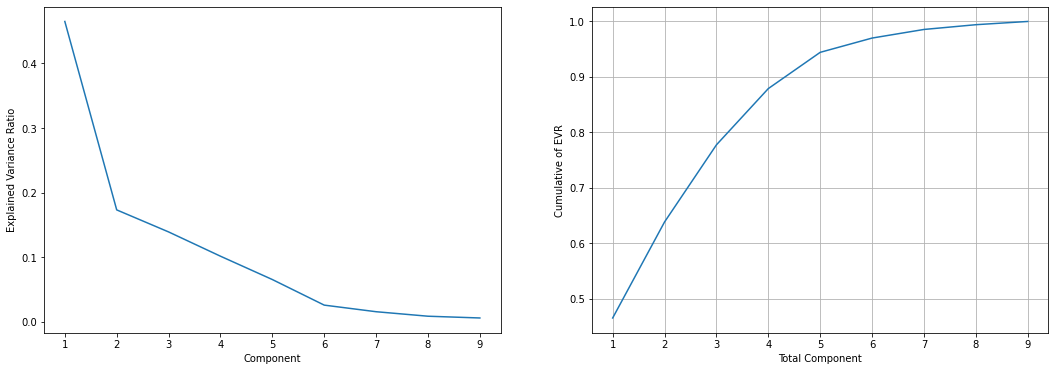

In [58]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
plt.grid()
ax[0].plot(range(1,10), pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,10), np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Total Component')
ax[1].set_ylabel('Cumulative of EVR')

plt.show()

If viewed based on the EVR graph, the 9 features contained in the dataset based on the VIF cumsum EVR value is more than 90%. And after seeing this EVR graph, the author decided to take only 5 features because the cumsum EVR value did not decrease much, it was still at 90%.

In [59]:
pca = PCA(n_components=5)
train_pca = pca.fit_transform(train_scaled)

# **VII. MACHINE LEARNING MODELS**

## 7.1 K-MEAN CLUSTERING

### 7.1.1 FINDING OPTIMUM K USING ELBOW METHOD

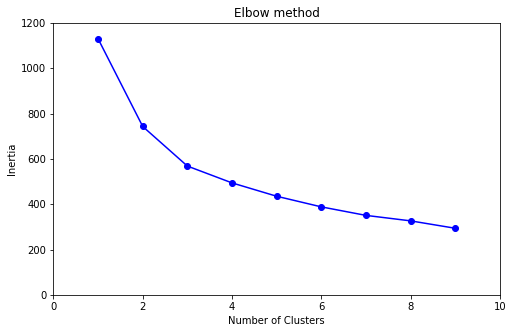

In [60]:
kmeans_models = [KMeans(n_clusters=k, random_state=1).fit(train_pca) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, 'bo-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axis([0, 10, 0, 1200]);

Based on the graph of the elbow method, the most significant inertia reduction is at position K equal to 3. The author will try to use the silhouette score method to ensure the most optimal number of clusters.

### 7.1.2 FINDING OPTIMUM K USING SILHOUTTE SCORE

In [61]:
silhouette_scores = [silhouette_score(train_pca, model.labels_)
                     for model in kmeans_models[1:]]

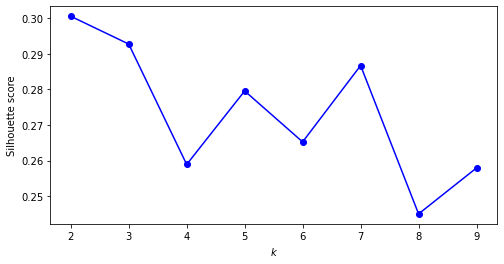

In [62]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

If you look at the silhouette score, it can be seen that K equals 3 is the best value.

Here is the visualization of the silhoutte score from k = 2 to k = 7.

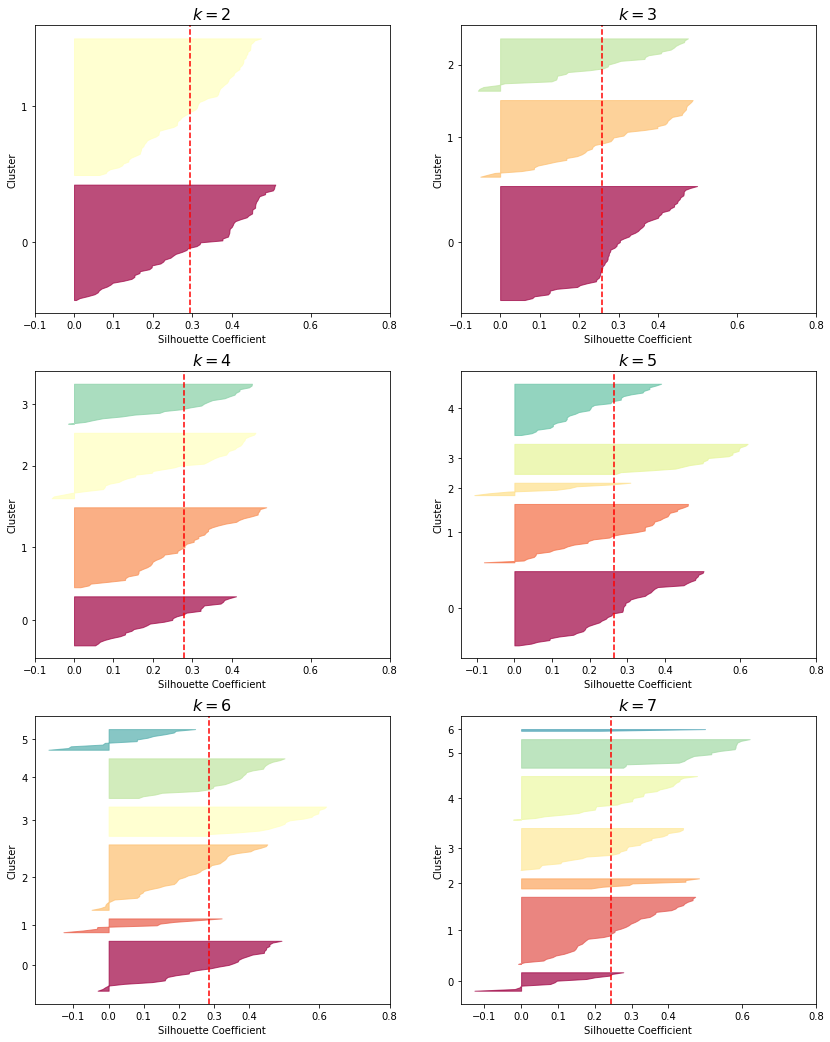

In [63]:
plt.figure(figsize=(14, 18))

for k in (2, 3, 4, 5, 6, 7):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_models[k-1].labels_
    silhouette_coefficients = silhouette_samples(train_pca, y_pred)

    padding = len(train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 3, 4, 5, 6, 7):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5, 6, 7):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Based on the silhouette plot graph, it can be seen that almost all of them exceed the silhouette scores line limit. Then if you look at the shape of the silhouette, there is actually nothing that is almost similar in thickness, it's just that according to the author, between 2 clusters or 3 clusters the shape is better than the others. Then look at the silhouette whose value is less than 0, between K=2 and K=3 the number is less at K=3, this means that there won't be a lot of overlapping data on the K value equal to 3. So for clustering with the K-Means method on In this dataset, the best number of clusters is 3 clusters.

### 7.1.3 MODEL DEFINITION

In [64]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(train_pca)

KMeans(n_clusters=3, random_state=1)

Below is the visualization of the clustering on the train dataset.

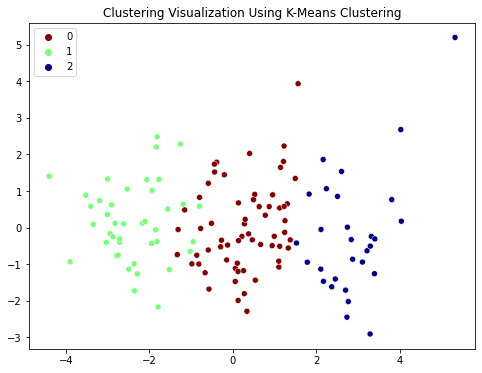

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=kmeans.labels_, palette='jet_r')
ax.set_title('Clustering Visualization Using K-Means Clustering');

The image above is a visualization of the results of clustering using K-Means

### 7.1.4 MODEL SCORE

And this is the score evaluation based on the some clustering scoring system.

In [66]:
result_comp = pd.DataFrame({'Model' : ['K-Means'],
                  'Silhouete Score' : [silhouette_score(train_pca, kmeans.labels_)],
                  'Davies Score' : [davies_bouldin_score(train_pca, kmeans.labels_)],
                  'Calinski Score' : [calinski_harabasz_score(train_pca, kmeans.labels_)]})
result_comp

,Model,Silhouete Score,Davies Score,Calinski Score
0,K-Means,0.29272,1.212632,64.259703


# **VIII. ML MODELS TEST**

## 8.1 K-MEANS TEST

In [67]:
test_cleaned = capper.transform(test)

In [68]:
test_cleaned_scaled = scaler.transform(test_cleaned)

In [69]:
test_pca = pca.transform(test_cleaned_scaled)

In [70]:
kmeans_test = KMeans(n_clusters=3, max_iter=500, random_state=1)
kmeans_test.fit(test_pca)

KMeans(max_iter=500, n_clusters=3, random_state=1)

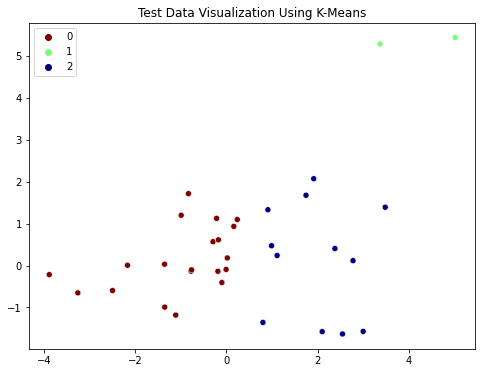

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=kmeans_test.labels_, palette='jet_r')
ax.set_title('Test Data Visualization Using K-Means');

The image above is the result of clustering visualization on test data using a model based on train data. Cluster 1 is in the top right position. When compared with the results of the clusterization of the train data, the 2 data clustered as label 1 should be label 2.

# **IX. EXPLORATORY DATA ANALYSIS BASED ON CLUSTERING RESULT**

In [72]:
train['cluster_id'] = kmeans.labels_
test['cluster_id'] = kmeans_test.labels_

In [73]:
clust_df = pd.concat([train, test], axis=0, ignore_index=True)
clust_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,2
1,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
2,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,0
3,63.6,12.0,10.50,30.0,1350,2.610,64.6,4.51,563,1
4,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,2
...,...,...,...,...,...,...,...,...,...,...
162,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702,0
163,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,0
164,20.7,26.9,4.47,57.1,9920,4.440,71.6,2.07,6230,0
165,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130,0


In [74]:
clust_df['country'] = df['country']

In [77]:
clust_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,2,Afghanistan
1,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,Albania
2,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,0,Algeria
3,63.6,12.0,10.50,30.0,1350,2.610,64.6,4.51,563,1,Angola
4,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,2,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702,0,Vanuatu
163,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,0,Venezuela
164,20.7,26.9,4.47,57.1,9920,4.440,71.6,2.07,6230,0,Vietnam
165,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130,0,Yemen


[Text(0, 0, '82'), Text(0, 0, '44'), Text(0, 0, '41')]

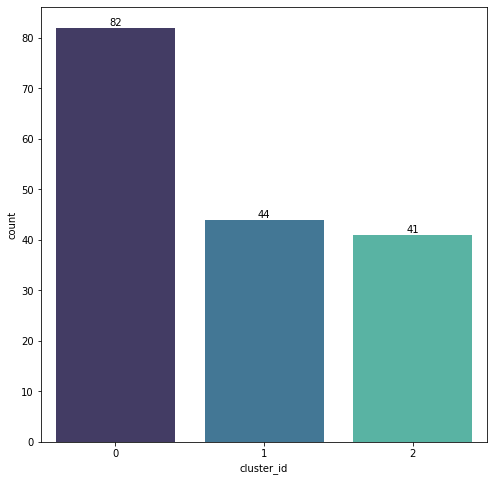

In [75]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=clust_df, x='cluster_id', palette='mako')
ax.bar_label(ax.containers[0], label_type='edge')

Based on the picture above, cluster 0 is the cluster with the largest amount of data, followed by cluster 1 and cluster 2.

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 864x864 with 0 Axes>

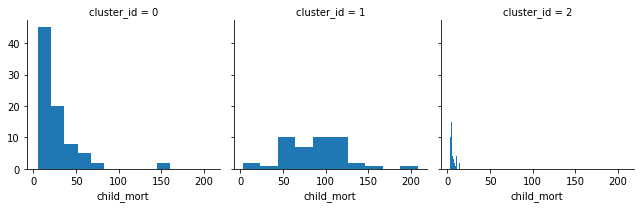

<Figure size 864x864 with 0 Axes>

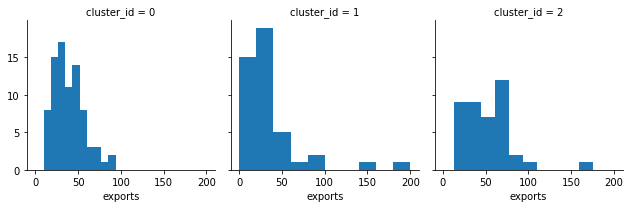

<Figure size 864x864 with 0 Axes>

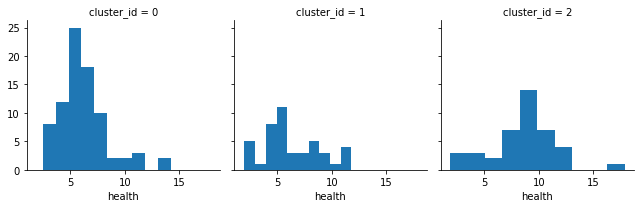

<Figure size 864x864 with 0 Axes>

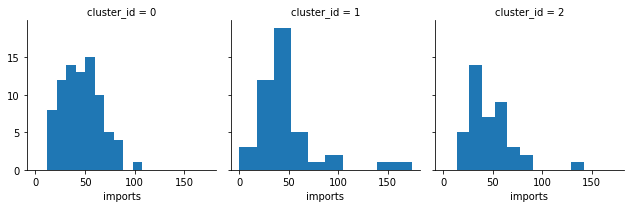

<Figure size 864x864 with 0 Axes>

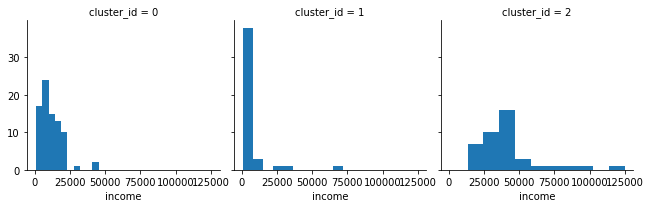

<Figure size 864x864 with 0 Axes>

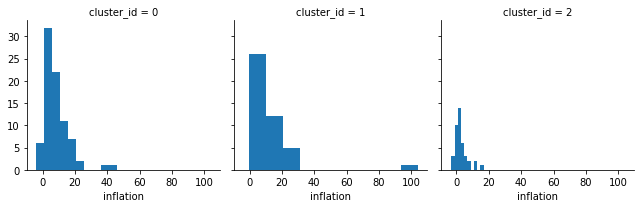

<Figure size 864x864 with 0 Axes>

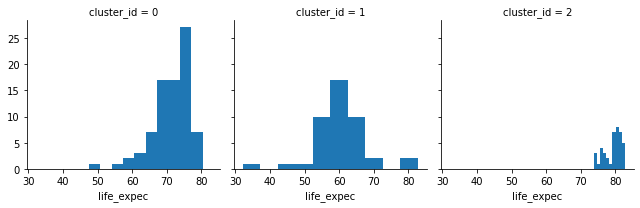

<Figure size 864x864 with 0 Axes>

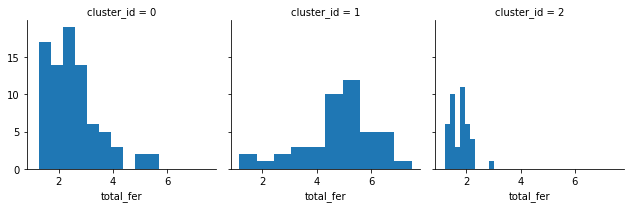

<Figure size 864x864 with 0 Axes>

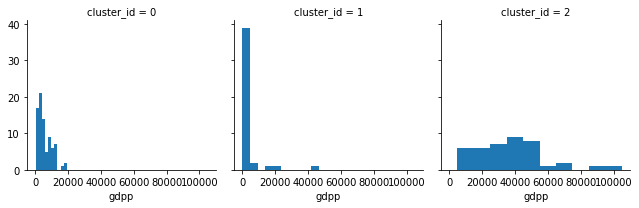

<Figure size 864x864 with 0 Axes>

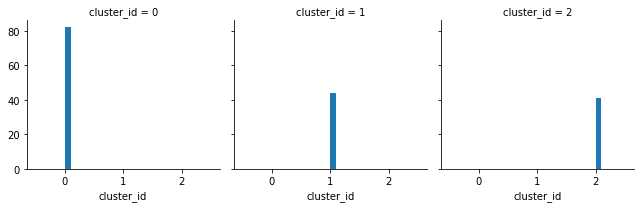

<Figure size 864x864 with 0 Axes>

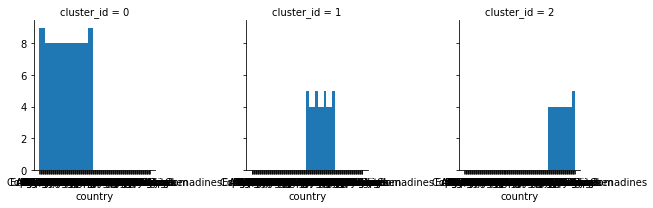

In [76]:
for cols in clust_df:
    g = sns.FacetGrid(clust_df, col = 'cluster_id')
    plt.figure(figsize=(12,12))
    g.map(plt.hist, cols)

Here are my observations about each cluster:

- Cluster 0 is the cluster with the highest child mortality, cluster 1 and cluster 2 have child mortality below cluster 0 where cluster 2 is the cluster with the lowest child mortality.
- Cluster 0 is a cluster with an export level below 100
- Cluster 1 is the cluster with the highest import rate
- Cluster 1 is a cluster with low income, cluster 2 is a cluster with high income. Even so, cluster 0 is a cluster with a high relevant inflation value.
- Cluster 2 is the cluster with the highest life expectation compared to the others.
- Because cluster 0 has high child mortality, the total fertility of cluster 0 is also the highest compared to other clusters.
- Cluster 2 is the cluster with the highest GDP value. Directly proportional to the characteristics of income in cluster 2

In [85]:
clust_df[clust_df['cluster_id']==0][['country']]

,country
1,Albania
2,Algeria
5,Argentina
6,Armenia
8,Austria
...,...
161,Uzbekistan
162,Vanuatu
163,Venezuela
164,Vietnam


In [83]:
clust_df[clust_df['cluster_id']==1][['country']]

,country
3,Angola
7,Australia
11,Bahrain
12,Bangladesh
19,Bolivia
20,Bosnia and Herzegovina
25,Burkina Faso
29,Canada
31,Central African Republic
34,China


In [84]:
clust_df[clust_df['cluster_id']==2][['country']]

,country
0,Afghanistan
4,Antigua and Barbuda
16,Belize
18,Bhutan
24,Bulgaria
33,Chile
35,Colombia
40,Cote d'Ivoire
46,Ecuador
47,Egypt


# **X. CONCLUSION**

The following are conclusions that can be drawn from the results of the analysis:

1. Some interesting insights that can be taken are that people with low incomes have higher spending on the health sector than people with high incomes. Then, Qatar is the country with the highest income, but its GDP is ranked 3rd, while the first position of the country with the highest GDP is Luxembourg.
2. Based on the results of the analysis, there are 3 clusters that have been created. The optimal value of the cluster according to PCA and also the silhouette score is 2 or 3.
3. Cluster 0 is a cluster dominated by people with low income, countries with export rates below 100, child mortality and the highest total fertility. Cluster 1 is the cluster with the highest import rate, dominated by people with low incomes, who have the lowest spending on the health sector. Cluster 2 are people with high income.